# Volume 4: Optimal Control as Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

In [43]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    

    # find optimal u
    # s = [x, x']
    # s' = [x', u] = f
    # H = p1*x' + p2*u - x^2 - 2pi/5*(u^2)
    # DH/Du = 0 = p2 - 4pi/5*u
    # -> u = p2 * 5 / (4*pi)
    # p1' = -DH/Dx = -(-2x) = 2x
    # p2' = -DH/(Dx') = -(p1)


    def ode(t, y):
        # y = [x, x', p1, p2]
        # x" = u = -p2 * 5 / (4*pi)
        return np.array([y[1], y[3]*5/4/np.pi, 2*y[0], -y[2]])

    def bc(ya, yb):
        return np.array([ya[0], ya[1]-1, yb[0]-16, yb[1]-10])

    x = np.linspace(0, 30, 100)
    y0 = np.zeros((4, x.size))
    y0[0] = 0

    # solve the problem
    sol = solve_bvp(ode, bc, x, y0)

    return sol


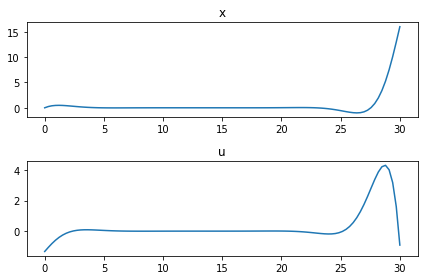

In [42]:
sol = prob1()
plt.subplot(211)
plt.plot(sol.x, sol.y[0], label="x")
plt.title("x")
plt.subplot(212)
plt.plot(sol.x, (sol.y[3])*5/4/np.pi, label="u")
plt.title("u")
plt.tight_layout()
plt.show()


## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [39]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [50]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem

    t_0 = 0
    t_f = 20
    (c_x,c_y) = (4,1)
    (r_x,r_y) = (5,.5)
    lamb = 20
    s_0 = [6, 1.5,0,0] 
    s_f = [0,0,0,0]
    W1 = 35
    W2 = 7
    '''
    # initial variables
    t_0 = 0
    t_f = 20
    c = (4,1)
    r = (5,.5)
    lamb = 20
    s_0 = [6, 1.5,0,0] 
    s_f = [0,0,0,0]
    W1 = 35
    W2 = 7

    def ode(t, y):
        # y = [s1, s2, s3, s4, p1, p2, p3, p4]

        return np.array([y[2], y[3], y[6]/(2*W2), y[7]/(2*W2), 
                         obstacle_dx(y[0],y[1],W1,r,c), 
                         obstacle_dy(y[0],y[1],W1,r,c), 
                         -y[4], -y[5]])
    
    def bc(ya, yb):
        return np.array([ya[0]-6, ya[1]-1.5,ya[2],ya[3], yb[0], yb[1], yb[2], yb[3]])

    x = np.linspace(0, 30, 100)
    y0 = np.zeros((8, x.size))
    y0[0] = 0

    # solve the problem
    sol = solve_bvp(ode, bc, x, y0, max_nodes=30000)

    return sol


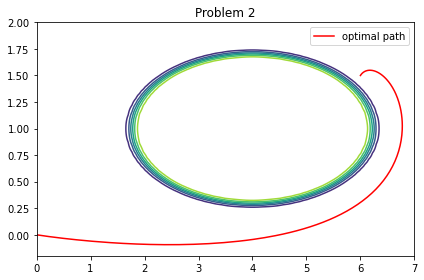

In [98]:
sol = prob2()
# plot
W1 = 35
x, y = np.linspace(0, 7, 100), np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, obstacle(X, Y, c = (4,1),r = (5,.5), W1=W1))
plt.plot(sol.y[0], sol.y[1], color='red', label="optimal path")

plt.legend()
plt.title("Problem 2")
plt.tight_layout()
plt.show()


## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

In [82]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    def ode(t,y,p):
        ''' define the ode system '''
        return p[0]*np.array([y[1], np.sin(t) -3*y[0]])

    def bc(ya,yb,p):
        ''' define the boundary conditions '''
        return np.array([ya[0], yb[0] - np.pi/2, yb[1] - 1/2*(np.sqrt(3)*np.pi/np.tan(np.pi*np.sqrt(75))) - 0.5])

    # give the time domain
    t_steps = 100
    t = np.linspace(0,1,t_steps)
    # give an initial guess
    y0 = np.ones((2,t_steps))
    p0 = np.array([5*np.pi])
    # solve the system
    sol = solve_bvp(ode, bc, t, y0, p0)

    tf = sol.p[0]

    plt.plot(sol.p[0]*t,sol.sol(t)[0])
    plt.xlabel('t')
    plt.title("tf = {}".format(np.round(tf, 2)))
    plt.ylabel('y(t)')
    plt.show()
       

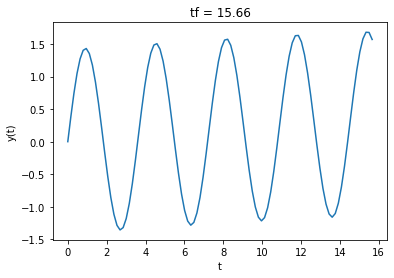

In [85]:
prob3()

It seems like the solver finds whatever tf I put in as the optimal solution. 

## Problem 4
Refactor your code from problem 2 to create a free end time BVP and use a new boundary value derived from 14.14.
Plot the solution you found.
What is the optimal time?

In [101]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    # initial variables
    t_0 = 0
    t_f = 20
    c = (4,1)
    r = (5,.5)
    lamb = 20
    s_0 = [6, 1.5,0,0] 
    s_f = [0,0,0,0]
    W1 = 35
    W2 = 7

    def ode(t, y, p):
        # y = [s1, s2, s3, s4, p1, p2, p3, p4]

        return p[0]*np.array([y[2], y[3], y[6]/(2*W2), y[7]/(2*W2), 
                         obstacle_dx(y[0],y[1],W1,r,c), 
                         obstacle_dy(y[0],y[1],W1,r,c), 
                         -y[4], -y[5]])
    
    def bc(ya, yb, p):
        return np.array([ya[0]-6, ya[1]-1.5,ya[2],ya[3], yb[0], yb[1], yb[2], yb[3],
                         yb[6]*yb[6]/(2*W2)+ yb[7]*yb[7]/(2*W2) - (1+obstacle(0,0,W1,r,c)+W2*(np.abs(yb[6]/(2*W2))**2))])
        # 0 = p3u1 + p4u2 - (1+C(s1,s2) + W2*np.abs(u1)**2)

    # x = np.linspace(0, 30, 100)
    # y0 = np.zeros((9, x.size))
    # y0[0] = 0

    # # solve the problem
    # sol = solve_bvp(ode, bc, x, y0, max_nodes=30000)

    # give the time domain
    t_steps = 100
    t = np.linspace(0,1,t_steps)
    # give an initial guess
    y0 = np.ones((8,t_steps))
    p0 = np.array([20])
    # solve the system
    sol = solve_bvp(ode, bc, t, y0, p0, max_nodes=30000)

    # tf = sol.p[0]

    # plt.plot(sol.p[0]*t,sol.sol(t)[0])
    # plt.xlabel('t')
    # plt.title("tf = {}".format(np.round(tf, 2)))
    # plt.ylabel('y(t)')
    # plt.show()

    return sol

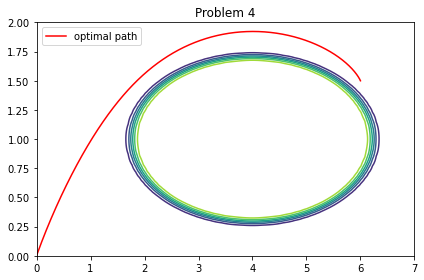

In [102]:
sol = prob4()
W1 = 35
x, y = np.linspace(0, 7, 100), np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, obstacle(X, Y, c = (4,1),r = (5,.5), W1=W1))
plt.plot(sol.y[0], sol.y[1], color='red', label="optimal path")

plt.legend()
plt.title("Problem 4")
plt.tight_layout()
plt.show()